<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Importing The Library</center>
</h1>
</div>

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad
nltk.download('vader_lexicon')
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Importing The Data</center>
</h1>
</div>

In [2]:
df=pd.read_csv("/content/Reviews.csv")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Have a look</center>
</h1>
</div>

In [3]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#18EAC1;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Preprocessing the Data</center>
</h1>
</div>

In [4]:
import re #[\s!-@^#$]
df['Text']  = df['Text'].apply(lambda x: re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))','',str(x)))
df['Text']  = df['Text'].apply(lambda x: re.sub('[!:?;*.,-]|[@]','',str(x)))
df['Text']  = df['Text'].apply(lambda x : x.lower())
df['Text']

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price  there was a wide...
                                ...                        
568449    great for sesame chickenthis is a good if not ...
568450    i'm disappointed with the flavor the chocolate...
568451    these stars are small so you can give 1015 of ...
568452    these are the best treats for training and rew...
568453    i am very satisfied product is as advertised i...
Name: Text, Length: 568454, dtype: object

In [5]:
data=df[['Text']]

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#EA570E;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">
    <center>Vader Sentiment Analysis</center>
</h1>
</div>

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ What is Vader ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion.
</div>

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ What is polarity in Vader Sentiment Analysis ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.
</div>

<blockquote><h1 style=" color:#159364; font-family:verdana;">🕵️ What is Compound Score in Vader Sentiment Analysis ?</h1></blockquote>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
📌 &nbsp;The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).
</div>

In [6]:

# Copying the data into a new dataframe called vader
vader=data.copy()

sentiment=vad()
# Making additional columns for sentiment score in the vader dataframe
sen=['Positive','Negative','Neutral']
sentiments=[sentiment.polarity_scores(i) for i in vader['Text'].values]
vader['Negative Score']=[i['neg'] for i in sentiments]
vader['Positive Score']=[i['pos'] for i in sentiments]
vader['Neutral Score']=[i['neu'] for i in sentiments]
vader['Compound Score']=[i['compound'] for i in sentiments]
score=vader['Compound Score'].values
t=[]
for i in score:
    if i >=0.05 :
        t.append('Positive')
    elif i<=-0.05 :
        t.append('Negative')
    else:
        t.append('Neutral')
vader['OverallSentiment']=t

In [7]:
# Having a look at the vader datafram
vader.head()

,Text,Negative Score,Positive Score,Neutral Score,Compound Score,OverallSentiment
0,i have bought several of the vitality canned d...,0.000,0.305,0.695,0.9441,Positive
1,product arrived labeled as jumbo salted peanut...,0.138,0.000,0.862,-0.5664,Negative
2,this is a confection that has been around a fe...,0.091,0.155,0.754,0.8265,Positive
3,if you are looking for the secret ingredient i...,0.000,0.000,1.000,0.0000,Neutral
4,great taffy at a great price there was a wide...,0.000,0.448,0.552,0.9468,Positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


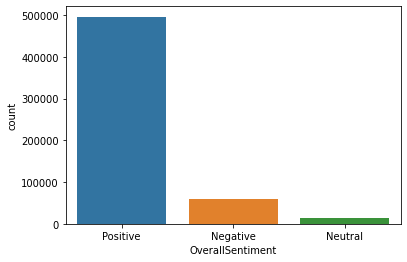

In [8]:
sns.countplot(vader['OverallSentiment'])

In [9]:

vaders = vader.merge(df, how='left')

In [10]:
vaders 

,Text,Negative Score,Positive Score,Neutral Score,Compound Score,OverallSentiment,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary
0,i have bought several of the vitality canned d...,0.000,0.305,0.695,0.9441,Positive,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food
1,product arrived labeled as jumbo salted peanut...,0.138,0.000,0.862,-0.5664,Negative,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised
2,this is a confection that has been around a fe...,0.091,0.155,0.754,0.8265,Positive,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all"
3,if you are looking for the secret ingredient i...,0.000,0.000,1.000,0.0000,Neutral,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine
4,if you are looking for the secret ingredient i...,0.000,0.000,1.000,0.0000,Neutral,136304,B002Y7526Y,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793381,great for sesame chickenthis is a good if not ...,0.072,0.327,0.600,0.8589,Positive,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without
1793382,i'm disappointed with the flavor the chocolate...,0.190,0.114,0.697,-0.4848,Negative,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed
1793383,these stars are small so you can give 1015 of ...,0.037,0.078,0.884,0.4352,Positive,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo
1793384,these are the best treats for training and rew...,0.042,0.442,0.516,0.9678,Positive,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat


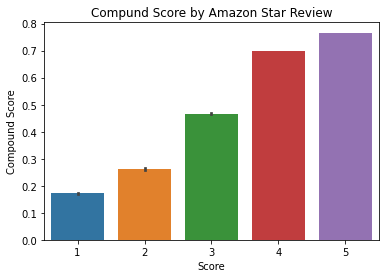

In [11]:
ax = sns.barplot(data=vaders, x='Score', y='Compound Score')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

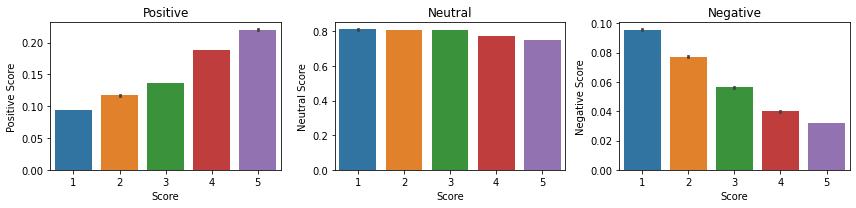

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='Positive Score', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='Neutral Score', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='Negative Score', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words("english"))
from nltk import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Find out the most common words that use in the Possitive reviews**

In [ ]:
docs = [word_tokenize(tweet) for tweet in vaders[vaders.OverallSentiment=='Positive']['Text'].astype(str)]
words = []
for doc in docs:
  words.extend(doc)
filtered_words = [w for w in words if w.isalpha() if not w in stop_words]
fdist = FreqDist(filtered_words)
plt.figure(figsize=(13,13))
fdist.plot(50, title = 'Top 50 Most Possitive  Words')

In [ ]:
docs = [word_tokenize(tweet) for tweet in vaders[vaders.OverallSentiment=='Positive']['Text'].astype(str)]
words = []
for doc in docs:
  words.extend(doc)
filtered_words = [w for w in words if w.isalpha() if not w in stop_words]
text = ' '.join(word for word in filtered_words)
color = 'black'
wordcloud = WordCloud(max_words=50,
                      background_color=color,
                      width=2500,
                      height=2000).generate(text)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Find out the most common words that use in the Negative reviews**

In [ ]:
docs = [word_tokenize(tweet) for tweet in vaders[vaders.OverallSentiment=='Negative']['Text'].astype(str)]
words = []
for doc in docs:
  words.extend(doc)
filtered_words = [w for w in words if w.isalpha() if not w in stop_words]
fdist = FreqDist(filtered_words)
plt.figure(figsize=(13,13))
fdist.plot(50, title = 'Top 50 Most Negative  Words')

In [ ]:
docs = [word_tokenize(tweet) for tweet in vaders[vaders.OverallSentiment=='Negative']['Text'].astype(str)]
words = []
for doc in docs:
  words.extend(doc)
filtered_words = [w for w in words if w.isalpha() if not w in stop_words]
text = ' '.join(word for word in filtered_words)
color = 'black'
wordcloud = WordCloud(max_words=50,
                      background_color=color,
                      width=2500,
                      height=2000).generate(text)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()